In [232]:
"""
------------------------------------------------------------------------------
About

Processing of the API christmas data that is registered
at https://www.berlin.de/sen/web/service/maerkte-feste/formular.230156.php
------------------------------------------------------------------------------
"""




'\n------------------------------------------------------------------------------\nAbout\n\nProcessing of the API christmas data that is registered\nat https://www.berlin.de/sen/web/service/maerkte-feste/formular.230156.php\n------------------------------------------------------------------------------\n'

In [233]:
"""
------------------------------------------------------------------------------
Libraries
------------------------------------------------------------------------------
"""

import requests
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point

import time

import re
from datetime import datetime

In [234]:
"""
------------------------------------------------------------------------------
Function
- fetch data from url
------------------------------------------------------------------------------
"""

def fetch_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status() 
        data = response.json()  #convert to json
        return data
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

In [235]:
#Xmas Data
url = "https://www.berlin.de/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/index/all.geojson?q="

xmasData = fetch_data(url)
print(xmasData)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [13.4086, 52.5191]}, 'properties': {'title': '183', 'href': '/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/183', 'description': '52,5191<br>13,4086<br> <a href="/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/183">Mehr...</a>', 'id': '/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/183', 'data': {'id': 183, 'bezirk': 'Mitte', 'name': 'Smash Burger', 'strasse': 'Landsberger Allee, Rotes Rathaus, Alexander Platz', 'plz': '', 'von': '01.11.2024', 'bis': '28.12.2024', 'veranstalter': 'Mr. Smash Burger', 'oeffnungszeiten': '14:00 Uhr bis 23:00 Uhr', 'email': 'vivien-selimi@gmx.de', 'w3': '/', 'bemerkungen': '/'}}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [13.6002, 52.4152]}, 'properties': {'title': '60', 'href': '/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/60', 'description': '52,415

In [236]:
list = []

for feature in xmasData["features"]:
    #data
    data = feature["properties"]["data"]

    #geometry
    coordinates = feature["geometry"]["coordinates"]

    #add coordinates to data
    data["lng"] = coordinates[0]
    data["lat"] = coordinates[1]


    list.append(data)

df = pd.DataFrame(list)


pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

df.head()

,id,bezirk,name,strasse,plz,von,bis,veranstalter,oeffnungszeiten,email,w3,bemerkungen,lng,lat
0,183,Mitte,Smash Burger,"Landsberger Allee, Rotes Rathaus, Alexander Platz",,01.11.2024,28.12.2024,Mr. Smash Burger,14:00 Uhr bis 23:00 Uhr,vivien-selimi@gmx.de,/,/,13.4086,52.5191
1,60,Treptow-Köpenick,Winterzauber Weihnachtsmarkt,Möllhausenufer 30,12555,01.11.2024,31.12.2024,Strandbad Wendenschloss GmbH,12:00 - 20:00 Uhr,info@strandbad-wendenschloss.berlin,https://strandbad-wendenschloss.berlin,/,13.6002,52.4152
2,63,Steglitz-Zehlendorf,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,Mexikoplatz und Bülowstraße 1-8,14163,01.12. / 15.12. / 22.12.2024,,KUNSTHAND-BERLIN Cornelja Hasler,11:00 - 18:00 Uhr,info@kunsthand-berlin.de,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",13.2327,52.4370
3,66,Steglitz-Zehlendorf,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,Mexikoplatz und Bülowstraße 1-8,14163,08.12.2024,08.12.2024,KUNSTHAND-BERLIN Cornelja Hasler,11:00 - 18:00 Uhr,info@kunsthand-berlin.de,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",13.2327,52.4370
4,102,Pankow,Adventsökomarkt der Grünen Liga,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,10405,01.12.2024,01.12.2024,GRÜNE LIGA Berlin,12:00 - 19:00 Uhr,oekomarkt.kollwitzplatz@grueneliga-berlin.de,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",13.4175,52.5366


In [237]:
#dupilcates
duplicates = df["name"].duplicated()

print(df[duplicates])

     id                bezirk                                             name                                                                    strasse    plz                                                   von                                                   bis                                                          veranstalter                                                               oeffnungszeiten                                         email                                                         w3                                                                                                                                                                                                                                                                                                                                                                                                                           bemerkungen      lng      lat
3    66   Steglitz-Zehlendorf  Kunstha

In [238]:
"""
------------------------------------------------------------------------------
CSV 2023
------------------------------------------------------------------------------
"""
data = pd.read_csv("../public/markets_2023.csv", sep = ";")

df_2023 = pd.DataFrame(data)

In [239]:
#images
df_2023_images = df_2023[pd.notna(df_2023["image"])]

df_2023_images 


,id,name,shortname,strasse,plz_ort,bezirk,veranstalter,von,bis,oeffnungszeiten,email,w3,bemerkungen,lat,lng,rss_titel,rss_beschreibung,barrierefrei,immer-kostenlos,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,merged,international,barrierefrei.1,action,image,urheberschaft,train,train_distance,short_distance,ignore
9,10,Berliner Weihnachtszeit mit der Eiswelt am Neptunbrunnen vor dem Roten Rathaus,Berliner Weihnachtszeit am Neptunbrunnen,Rathausstr. 15,10178 Berlin,Mitte,Laubinger Event GmbH\nwww.berliner-weihnachtszeit.de,27.11.23,07.01.24,Mo-Fr 12:00-22:00 Uhr\nSa-So 11:00-22:00 Uhr\n\nHeiligabend geschlossen\n25.12. 11:00 - 21:00 Uhr\n26.12. 12:00 - 22:00 Uhr\n31.12. 12:00 - 20:00 Uhr\n07.01. 11:00 - 20:00 UhrMo-Fr 12:00-22:00 Uhr\nSa-So 11:00-22:00 Uhr\n\nHeiligabend geschlossen\n25.12. 11:00 - 21:00 Uhr\n26.12. 12:00 - 22:00 Uhr\n31.12. 12:00 - 20:00 Uhr\n07.01. 11:00 - 20:00 UhrMo-Fr 12:00-22:00 Uhr\nSa-So 11:00-22:00 Uhr\n\nHeiligabend geschlossen\n25.12. 11:00 - 21:00 Uhr\n26.12. 12:00 - 22:00 Uhr\n31.12. 12:00 - 20:00 Uhr\n07.01. 11:00 - 20:00 UhrMo-Fr 12:00-22:00 Uhr\nSa-So 11:00-22:00 Uhr\n\nHeiligabend geschlossen\n25.12. 11:00 - 21:00 Uhr\n26.12. 12:00 - 22:00 Uhr\n31.12. 12:00 - 20:00 Uhr\n07.01. 11:00 - 20:00 Uhr,mailto:ch.laubinger@laubinger.de,https://www.berliner-weihnachtszeit.de,Informationen erhalten Sie auf folgender Seite:\nwww.berliner-weihnachtszeit.de\n\nHeiligabend geschlossen,52.519494,13.407032,Berliner Weihnachtszeit mit der Eiswelt am Neptunbrunnen vor dem Roten Rathaus,Rathausstr. 15,NaN,1,12:00-22:00,12:00-22:00,12:00-22:00,12:00-22:00,12:00-22:00,11:00-22:00,11:00-22:00,24.12.23,"25.12.23=11:00-21:00, 26.12.23=12:00-22:00, 31.12.23=12:00-20:00, 07.01.23=11:00-20:00",0,0,0,1,Weihnachtsmarkt_Rotes_Rathaus.jpg,"Angela Monika Arnold, Berlin, CC BY-SA 3.0, via Wikimedia Commons","U Rotes Rathaus (U5), S+U Alexanderplatz Bhf","1,148,549,332,228",1,0
20,21,Lucia Weihnachtsmarkt in der Kulturbrauerei 2023,Lucia Weihnachtsmarkt in der Kulturbrauerei,Schönhauser Allee 36,10435 Berlin,Pankow,KETERING Veranstaltungs-GmbH,27.11.23,22.12.23,Mo-Fr 15:00-22:00 Uhr\nSa-So 13:00-22:00 UhrMo-Fr 15:00-22:00 Uhr\nSa-So 13:00-22:00 UhrMo-Fr 15:00-22:00 Uhr\nSa-So 13:00-22:00 Uhr,mailto:info@ketering.de,https://www.lucia-weihnachtsmarkt.de/,Eintritt kostenlos,52.538360,13.412750,Lucia Weihnachtsmarkt in der Kulturbrauerei 2023,Schönhauser Allee 36,NaN,1,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,15:00-22:00,13:00-22:00,13:00-22:00,0,0,0,1,0,0,Lucia_Weihnachtsmarkt.jpg,"Auto1234, CC BY-SA 3.0 via Wikimedia Commons",U Eberswalder Str. (U2),"1,662,783,638,767",1,0
28,29,Rudower Weihnachtsmeile,Rudower Weihnachtsmeile,Alt-Rudow 1,12357 Berlin,Neukölln,"Jüttner Entertainment, Christian Jüttner Tel.: 0152/33 90 83 98",16.12.23,17.12.23,Sa 12:00-22:00 Uhr\nSo 11:00-20:00 UhrSa 12:00-22:00 Uhr\nSo 11:00-20:00 UhrSa 12:00-22:00 Uhr\nSo 11:00-20:00 Uhr,mailto:info@juettner-entertainment.de,https://www.juettner-entertainment.de,"Eintritt Kostenfrei, Barrierefrei, \nWeihnachtliche Konzerte auf 2 Bühnen, Kunsthandwerk, Kinderfahrgeschäfte und weihnachtliche Gastronomie",52.420200,13.492350,Rudower Weihnachtsmeile,Alt-Rudow 1,1.0,1,0,0,0,0,0,12:00-22:00,11:00-20:00,0,0,0,0,1,1,Weihnachtsmarkt_Rudow.jpg,Lisa S.,U Rudow (U7),"4,665,127,948,546",0,0
29,30,Spandauer Weihnachtsmarkt - Spandau Markt,Spandauer Weihnachtsmarkt,Markt,13597 Berlin,Spandau,"Partner für Spandau Gesellschaft für Bezirks-Marketing mbH\nBreite Str. 37, 13597 Berlin\nwww.partner-fuer-spandau.de",27.11.23,23.12.23,So-Do 11:00-20:00 Uhr\nFr-Sa 11:00-22:00 UhrSo-Do 11:00-20:00 Uhr\nFr-Sa 11:00-22:00 UhrSo-Do 11:00-20:00 Uhr\nFr-Sa 11:00-22:00 Uhr,mailto:info@partner-fuer-spandau.de,https://www.spandauer-weihnachtsmarkt.de,50 Jahre Spandauer Weihnachtsmarkt 1974 – 2023\nEintritt frei,52.537350,13.204300,Spandauer Weihnachtsmarkt,Markt,NaN,1,11:00-20:00,11:00-20:00,11:00-20:00,11:00-20:00,11:00-22:00,11:00-22:00,11:00-20:00,0,0,0,0,0,0,Spandau_Weihnachtsmarkt.jpg,"Co

In [240]:
#add new empty columns "shortname", "plz_ort", "train", "von", "bis", "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "ignore", "immer-kostenlos", "international", "barrierefrei", "action", "short_distance"

df["shortname"] = None
df["plz_ort"] = None
df["Mo"] = None
df["Di"] = None
df["Mi"] = None
df["Do"] = None
df["Fr"] = None
df["Sa"] = None
df["So"] = None
df["closed-exc"] = None
df["hours-exc"] = None
df["ignore"] = 0
df["immer-kostenlos"] = 0
df["international"] = 0
df["barrierefrei"] = 0
df["action"] = 0
df["short_distance"] = 0
df["bemerkungen_en"] = None

#new order of data frame columns
df = df[["id","name", "shortname", "strasse", "bezirk", "plz", "plz_ort", "von", "bis", "oeffnungszeiten", "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "w3", "bemerkungen", "bemerkungen_en", "lat", "lng", "ignore", "immer-kostenlos", "international", "barrierefrei", "action", "short_distance"]]

df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,None,01.11.2024,28.12.2024,14:00 Uhr bis 23:00 Uhr,None,None,None,None,None,None,None,None,None,/,/,None,52.5191,13.4086,0,0,0,0,0,0
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,None,01.11.2024,31.12.2024,12:00 - 20:00 Uhr,None,None,None,None,None,None,None,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,None,01.12. / 15.12. / 22.12.2024,,11:00 - 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,None,08.12.2024,08.12.2024,11:00 - 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,None,01.12.2024,01.12.2024,12:00 - 19:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0


In [241]:
#column "ort"
df["bezirk"].unique()

list_bez = ['Mitte', 'Treptow-Köpenick', 'Steglitz-Zehlendorf', 'Pankow',
       'Spandau', 'Reinickendorf', 'Tempelhof-Schöneberg',
       'Marzahn-Hellersdorf', 'Charlottenburg-Wilmersdorf', 'Potsdam',
       'Friedrichshain-Kreuzberg', 'Neukölln']

df["ort"] = "Berlin"

df.loc[~df["bezirk"].isin(list_bez), "ort"] = None

In [242]:
#combined column "plz_ort" as str
df["plz_ort"] = df["plz"].astype(str) + " " + df["ort"]
df["plz_ort"].astype(str)

df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,Berlin,01.11.2024,28.12.2024,14:00 Uhr bis 23:00 Uhr,None,None,None,None,None,None,None,None,None,/,/,None,52.5191,13.4086,0,0,0,0,0,0,Berlin
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,12555 Berlin,01.11.2024,31.12.2024,12:00 - 20:00 Uhr,None,None,None,None,None,None,None,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,Berlin
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,01.12. / 15.12. / 22.12.2024,,11:00 - 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,08.12.2024,08.12.2024,11:00 - 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,10405 Berlin,01.12.2024,01.12.2024,12:00 - 19:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,Berlin


In [243]:
"""
------------------------------------------------------------------------------
ignore
------------------------------------------------------------------------------
"""

names_to_ignore = ["Smash Burger"]
df.loc[df["name"].isin(names_to_ignore), "ignore"] = 1

df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,Berlin,01.11.2024,28.12.2024,14:00 Uhr bis 23:00 Uhr,None,None,None,None,None,None,None,None,None,/,/,None,52.5191,13.4086,1,0,0,0,0,0,Berlin
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,12555 Berlin,01.11.2024,31.12.2024,12:00 - 20:00 Uhr,None,None,None,None,None,None,None,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,Berlin
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,01.12. / 15.12. / 22.12.2024,,11:00 - 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,08.12.2024,08.12.2024,11:00 - 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,10405 Berlin,01.12.2024,01.12.2024,12:00 - 19:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,Berlin


In [244]:
"""
------------------------------------------------------------------------------
date time
------------------------------------------------------------------------------
"""

def convert_to_datetime(date_str):
    try:
        #convert in datetime if possible
        date = pd.to_datetime(date_str, format="%d.%m.%Y", dayfirst=True, errors="raise")
        return date
    except (ValueError, TypeError):
        #if error occurs keep original date str
        print(f"Error in conversion: {date_str}") 
        return date_str

#convert to datetime
df["von"] = df["von"].apply(convert_to_datetime)
df["bis"] = df["bis"].apply(convert_to_datetime)

df.head()

Error in conversion: 01.12. / 15.12. / 22.12.2024
Error in conversion: 30.11.2024 /
07.12.2024 /
14.12.2024 /
21.12.2024
Error in conversion: 30.11. bis 01.12. / 07.12. bis 08.12. / 14.12. bis 15.12.  21.12. bis 22.12.2024
Error in conversion: 01.12.2024 /
08.12.2024 /
15.12.2024 /
22.12.2024


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,Berlin,2024-11-01 00:00:00,2024-12-28 00:00:00,14:00 Uhr bis 23:00 Uhr,None,None,None,None,None,None,None,None,None,/,/,None,52.5191,13.4086,1,0,0,0,0,0,Berlin
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,12555 Berlin,2024-11-01 00:00:00,2024-12-31 00:00:00,12:00 - 20:00 Uhr,None,None,None,None,None,None,None,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,Berlin
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,01.12. / 15.12. / 22.12.2024,NaT,11:00 - 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,2024-12-08 00:00:00,2024-12-08 00:00:00,11:00 - 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,10405 Berlin,2024-12-01 00:00:00,2024-12-01 00:00:00,12:00 - 19:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,Berlin


In [245]:
#fill empty strings in "bis" with NA
df["bis"].replace(to_replace=["", " ", None], value=pd.NA, inplace=True)
print(df["bis"].isna().sum())

5


/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_29255/4180451837.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bis"].replace(to_replace=["", " ", None], value=pd.NA, inplace=True)


In [246]:
#fill NAs in "bis" with value from "von"
df["bis"] = df["bis"].fillna(df["von"])

df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,Berlin,2024-11-01 00:00:00,2024-12-28 00:00:00,14:00 Uhr bis 23:00 Uhr,None,None,None,None,None,None,None,None,None,/,/,None,52.5191,13.4086,1,0,0,0,0,0,Berlin
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,12555 Berlin,2024-11-01 00:00:00,2024-12-31 00:00:00,12:00 - 20:00 Uhr,None,None,None,None,None,None,None,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,Berlin
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,2024-12-08 00:00:00,2024-12-08 00:00:00,11:00 - 18:00 Uhr,None,None,None,None,None,None,None,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,10405 Berlin,2024-12-01 00:00:00,2024-12-01 00:00:00,12:00 - 19:00 Uhr,None,None,None,None,None,None,None,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,Berlin


In [247]:
print(df[["von", "bis"]].dtypes)

von    object
bis    object
dtype: object


In [248]:
def mark_weekdays(row):
    #check valid dates
    von_date = row["von"]
    bis_date = row["bis"]

    print(f"Curent values: von = {von_date}, bis = {bis_date}")

    #if dates are valid create date range
    if isinstance(von_date, pd.Timestamp) and isinstance(bis_date, pd.Timestamp):
        date_range = pd.date_range(von_date, bis_date)

        #print date range
        print(f"Date range: {date_range}")

        #insert 1 if weekday is in date range 
        weekdays = {0: "Mo", 1: "Di", 2: "Mi", 3: "Do", 4: "Fr", 5: "Sa", 6: "So"}
        for day_num, day_name in weekdays.items():
            row[day_name] = 1 if any(d.weekday() == day_num for d in date_range) else 0
    else:
        #insert 0 if dates are invalid
        for day_name in ["Mo", "Di", "Mi", "Do", "Fr", "Sa", "So"]:
            row[day_name] = 0

    return row

#apply to each row
df = df.apply(mark_weekdays, axis=1)

df.head()

Curent values: von = 2024-11-01 00:00:00, bis = 2024-12-28 00:00:00
Date range: DatetimeIndex(['2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04',
               '2024-11-05', '2024-11-06', '2024-11-07', '2024-11-08',
               '2024-11-09', '2024-11-10', '2024-11-11', '2024-11-12',
               '2024-11-13', '2024-11-14', '2024-11-15', '2024-11-16',
               '2024-11-17', '2024-11-18', '2024-11-19', '2024-11-20',
               '2024-11-21', '2024-11-22', '2024-11-23', '2024-11-24',
               '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-28',
               '2024-11-29', '2024-11-30', '2024-12-01', '2024-12-02',
               '2024-12-03', '2024-12-04', '2024-12-05', '2024-12-06',
               '2024-12-07', '2024-12-08', '2024-12-09', '2024-12-10',
               '2024-12-11', '2024-12-12', '2024-12-13', '2024-12-14',
               '2024-12-15', '2024-12-16', '2024-12-17', '2024-12-18',
               '2024-12-19', '2024-12-20', '2024-12-21', '2024-12-22

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,Berlin,2024-11-01 00:00:00,2024-12-28 00:00:00,14:00 Uhr bis 23:00 Uhr,1,1,1,1,1,1,1,None,None,/,/,None,52.5191,13.4086,1,0,0,0,0,0,Berlin
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,12555 Berlin,2024-11-01 00:00:00,2024-12-31 00:00:00,12:00 - 20:00 Uhr,1,1,1,1,1,1,1,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,Berlin
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,0,0,0,0,0,0,0,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,2024-12-08 00:00:00,2024-12-08 00:00:00,11:00 - 18:00 Uhr,0,0,0,0,0,0,1,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,10405 Berlin,2024-12-01 00:00:00,2024-12-01 00:00:00,12:00 - 19:00 Uhr,0,0,0,0,0,0,1,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,Berlin


In [249]:
#only date no time in columns "von" and "bis"

def convert_date(date):
    try:
        #to datetime
        date = pd.to_datetime(date, format="%d.%m.%Y %H:%M", errors="raise")
        return date.strftime("%d.%m.%y")   #only return date
    except (ValueError, TypeError):
        #return original value
        return date

df["von"] = df["von"].apply(convert_date)
df["bis"] = df["bis"].apply(convert_date)


df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,Berlin,01.11.24,28.12.24,14:00 Uhr bis 23:00 Uhr,1,1,1,1,1,1,1,None,None,/,/,None,52.5191,13.4086,1,0,0,0,0,0,Berlin
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,12555 Berlin,01.11.24,31.12.24,12:00 - 20:00 Uhr,1,1,1,1,1,1,1,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,Berlin
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,0,0,0,0,0,0,0,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,08.12.24,08.12.24,11:00 - 18:00 Uhr,0,0,0,0,0,0,1,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,10405 Berlin,01.12.24,01.12.24,12:00 - 19:00 Uhr,0,0,0,0,0,0,1,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,Berlin


In [250]:
"""
------------------------------------------------------------------------------
opening hours
------------------------------------------------------------------------------
"""


def convertOpeningHours(oeffnungszeiten):
    #delete "Uhr" and blank spaces
    cleaned = oeffnungszeiten.strip().replace("Uhr", "").replace("uhr", "").replace("bis", "-").replace(" ", "")
    cleaned = cleaned.replace(".", ":")

    #Regex for recognising the time formats HH:MM-HH:MM oder HH-HH
    pattern = r'(\d{1,2}:\d{2})\s*-\s*(\d{1,2}:\d{2})|(\d{1,2})\s*-\s*(\d{1,2})'
    
    #search for pattern
    match = re.search(pattern, cleaned)
    
    if match:
        
        #if HH:MM is found
        if match.group(1) and match.group(2):
            start_time = match.group(1)
            end_time = match.group(2)
        #if HH-HH is found
        elif match.group(3) and match.group(4):
            start_hour = match.group(3)
            end_hour = match.group(4)
            start_time = f"{start_hour}:00" 
            end_time = f"{end_hour}:00"
        else:
            #if format deviates, keep original "oeffnungszeiten"
            return None 
        
        #check 24-hour-format
        start_hour, start_minute = map(int, start_time.split(":"))
        end_hour, end_minute = map(int, end_time.split(":"))

        if (0 <= start_hour < 24) and (0 <= end_hour < 24):
            return f"{start_time}-{end_time}"


#apply function on column "oeffnungszeiten"
df["formatierteOeffnungszeit"] = df["oeffnungszeiten"].apply(convertOpeningHours)

df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,Berlin,01.11.24,28.12.24,14:00 Uhr bis 23:00 Uhr,1,1,1,1,1,1,1,None,None,/,/,None,52.5191,13.4086,1,0,0,0,0,0,Berlin,14:00-23:00
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,12555 Berlin,01.11.24,31.12.24,12:00 - 20:00 Uhr,1,1,1,1,1,1,1,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,Berlin,12:00-20:00
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,0,0,0,0,0,0,0,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin,11:00-18:00
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,08.12.24,08.12.24,11:00 - 18:00 Uhr,0,0,0,0,0,0,1,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin,11:00-18:00
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,10405 Berlin,01.12.24,01.12.24,12:00 - 19:00 Uhr,0,0,0,0,0,0,1,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,Berlin,12:00-19:00


In [251]:
#add formatted opening hour to weekdays == 1
for day in df[["Mo", "Di", "Mi", "Do", "Fr", "Sa", "So"]]:
    df[day] = df[day].mask(df[day] == 1, df["formatierteOeffnungszeit"])

df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,Berlin,01.11.24,28.12.24,14:00 Uhr bis 23:00 Uhr,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,None,None,/,/,None,52.5191,13.4086,1,0,0,0,0,0,Berlin,14:00-23:00
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,12555 Berlin,01.11.24,31.12.24,12:00 - 20:00 Uhr,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,Berlin,12:00-20:00
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,0,0,0,0,0,0,0,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin,11:00-18:00
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,08.12.24,08.12.24,11:00 - 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin,11:00-18:00
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,10405 Berlin,01.12.24,01.12.24,12:00 - 19:00 Uhr,0,0,0,0,0,0,12:00-19:00,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,Berlin,12:00-19:00


In [252]:
"""
------------------------------------------------------------------------------
clean text: bemerkungen
------------------------------------------------------------------------------
"""

#clean text
def clean_text(text):
    #text as str
    text = str(text)
    #remove special characters
    text = re.sub(r'[^\w\s:,-]', '', text)
    #lower case
    text = text.lower().strip()
    return text

In [253]:
df["cleanedBemerkungen"] = df["bemerkungen"].apply(clean_text)

In [254]:
"""
------------------------------------------------------------------------------
accessability
------------------------------------------------------------------------------
"""

#search for kexwords related to "barrierefrei" in cleanedBemerkungen
keywords = ["barrierefrei", "rollstuhlgerecht", "zugänglich", "barrierearm"]
#reg ex: \b complete words, \w*: allows variations in ending
pattern = r"\b(" + "|".join(keywords) + r")\w*\b"

#insert 1 in "barrierefrei" if keywords are found
df["barrierefrei"] = df["cleanedBemerkungen"].str.contains(pattern, case=False, regex=True).astype(int)

df.head()

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_29255/936722739.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["barrierefrei"] = df["cleanedBemerkungen"].str.contains(pattern, case=False, regex=True).astype(int)


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,Berlin,01.11.24,28.12.24,14:00 Uhr bis 23:00 Uhr,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,None,None,/,/,None,52.5191,13.4086,1,0,0,0,0,0,Berlin,14:00-23:00,
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,12555 Berlin,01.11.24,31.12.24,12:00 - 20:00 Uhr,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,Berlin,12:00-20:00,
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,0,0,0,0,0,0,0,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin,11:00-18:00,"es werden nur handgefertigte objekte kleiner ateliers und werkstätten gezeigt, die kunsthandwerker sind vor ort\nkeine handels-importware kein rahmenprogramm"
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,08.12.24,08.12.24,11:00 - 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin,11:00-18:00,"es werden nur handgefertigte objekte kleiner ateliers und werkstätten gezeigt, die kunsthandwerker sind vor ort\nkeine handels-importware kein rahmenprogramm"
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,10405 Berlin,01.12.24,01.12.24,12:00 - 19:00 Uhr,0,0,0,0,0,0,12:00-19:00,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,Berlin,12:00-19:00,"neben dem adventsökomarkt bleibt der wöchentliche donnerstag ökomarkt am kollwitzplatz bestehen und findet immer von 1200 bis 1900 uhr statt jeden donnerstag und an den adventssonntagen 112, 812 1512 und 22 12 2024"


In [255]:
#result barrierefrei
df[df["barrierefrei"]==1]

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen
37,180,Das Weihnachtshaus,None,Schädestr. 9-13,Zehlendorf,14165,NaN,15.12.24,15.12.24,15:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,15:00-18:00,None,None,/,"Am 3. Advent wird die Villa traditionell „Das Weihnachtshaus“. Finden Sie ausgefallene Geschenke an sozialen, bunten Ständen, verzieren Sie mit Ihren Kindern das eigene Hexenhaus oder genießen Sie das besinnliche Kulturprogramm, Stockbrot backen am Lagerfeuer und vieles mehr. Der barrierefreie Adventssonntag für die ganze Familie. Eintritt frei.",None,52.4363,13.2573,0,0,0,1,0,0,None,15:00-18:00,"am 3 advent wird die villa traditionell das weihnachtshaus finden sie ausgefallene geschenke an sozialen, bunten ständen, verzieren sie mit ihren kindern das eigene hexenhaus oder genießen sie das besinnliche kulturprogramm, stockbrot backen am lagerfeuer und vieles mehr der barrierefreie adventssonntag für die ganze familie eintritt frei"


In [256]:
"""
------------------------------------------------------------------------------
free entry
------------------------------------------------------------------------------
"""

#search for kexwords "Entritt frei" in cleanedBemerkungen
keywords = ["eintritt frei", "freier eintritt", "ohne eintritt", "eintritt kostenlos", "kostenlos", "eintritt kostenfrei", "kostenfrei"]
#reg ex: \b complete words, \w*: allows variations in ending
pattern = r"\b(" + "|".join(keywords) + r")\w*\b"

#insert 1 in "barrierefrei" if keywords are found
df["immer-kostenlos"] = df["cleanedBemerkungen"].str.contains(pattern, case=False, regex=True).astype(int)

df.head()

### teilweise freier Eintritt?

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_29255/3829032659.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["immer-kostenlos"] = df["cleanedBemerkungen"].str.contains(pattern, case=False, regex=True).astype(int)


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,Berlin,01.11.24,28.12.24,14:00 Uhr bis 23:00 Uhr,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,None,None,/,/,None,52.5191,13.4086,1,0,0,0,0,0,Berlin,14:00-23:00,
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,12555 Berlin,01.11.24,31.12.24,12:00 - 20:00 Uhr,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,Berlin,12:00-20:00,
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,0,0,0,0,0,0,0,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin,11:00-18:00,"es werden nur handgefertigte objekte kleiner ateliers und werkstätten gezeigt, die kunsthandwerker sind vor ort\nkeine handels-importware kein rahmenprogramm"
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,08.12.24,08.12.24,11:00 - 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin,11:00-18:00,"es werden nur handgefertigte objekte kleiner ateliers und werkstätten gezeigt, die kunsthandwerker sind vor ort\nkeine handels-importware kein rahmenprogramm"
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,10405 Berlin,01.12.24,01.12.24,12:00 - 19:00 Uhr,0,0,0,0,0,0,12:00-19:00,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,Berlin,12:00-19:00,"neben dem adventsökomarkt bleibt der wöchentliche donnerstag ökomarkt am kollwitzplatz bestehen und findet immer von 1200 bis 1900 uhr statt jeden donnerstag und an den adventssonntagen 112, 812 1512 und 22 12 2024"


In [257]:
#result eintritt frei
df[df["immer-kostenlos"]==1]

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen
11,93,46. Lichtenrader Lichtermarkt,None,Rund um den Dorfteich an der alten Dorfkirche,Tempelhof-Schöneberg,12309,12309 Berlin,01.12.24,01.12.24,13:00 - 19:00 Uhr,0,0,0,0,0,0,13:00-19:00,None,None,https://www.berlin.de/ba-ts/lichtenrader-lichtermarkt,"Er ist eine feste Größe in den Veranstaltungskalendern im vorweihnachtlichen Berlin: der Lichtenrader Lichtermarkt. Rund 100 Vereine, Initiativen und gemeinnützige Organisationen präsentieren ihre Angebote an einem Stand und läuten die Adventszeit in Tempelhof-Schöneberg mit ein. Es werden unter anderem verschiedenste Bastel- und Handarbeiten, Keramik, Holzwaren, Imkererzeugnisse, Nostalgisches, kunstgewerbliche Arbeiten und Spielsachen zum Verkauf angeboten. Kulinarische Köstlichkeiten laden an den weihnachtlich geschmückten Ständen in friedvoller Atmosphäre des ehemaligen Dorfkerns zum Verweilen ein. Lassen Sie sich vom Lichterglanz verzaubern und in vorweihnachtliche Stimmung versetzen! Eintritt frei! Der Lichtermarkt ist nicht gewinnorientiert. Die Einnahmeüberschüsse werden sozialen Zwecken zugeführt.",None,52.3906,13.4113,0,1,0,0,0,0,Berlin,13:00-19:00,"er ist eine feste größe in den veranstaltungskalendern im vorweihnachtlichen berlin: der lichtenrader lichtermarkt rund 100 vereine, initiativen und gemeinnützige organisationen präsentieren ihre angebote an einem stand und läuten die adventszeit in tempelhof-schöneberg mit ein es werden unter anderem verschiedenste bastel- und handarbeiten, keramik, holzwaren, imkererzeugnisse, nostalgisches, kunstgewerbliche arbeiten und spielsachen zum verkauf angeboten kulinarische köstlichkeiten laden an den weihnachtlich geschmückten ständen in friedvoller atmosphäre des ehemaligen dorfkerns zum verweilen ein lassen sie sich vom lichterglanz verzaubern und in vorweihnachtliche stimmung versetzen eintritt frei der lichtermarkt ist nicht gewinnorientiert die einnahmeüberschüsse werden sozialen zwecken zugeführt"
14,21,Weihnachtsmarkt Storkow,None,Marktplatz Storkow - Am Markt 10,Storkow (Mark),15859,NaN,06.12.24,08.12.24,14:00 - 20:00 Uhr,0,0,0,0,14:00-20:00,14:00-20:00,14:00-20:00,None,None,https://www.haupstadtkultur.berlin,"Freier Eintritt, Kinderkarussell, Food und Glühweinstände, Handel und Kunsthandwerk u.v.m.",None,52.2549,13.9311,0,1,0,0,0,0,None,14:00-20:00,"freier eintritt, kinderkarussell, food und glühweinstände, handel und kunsthandwerk uvm"
21,189,Adventsmarkt auf der Domäne Dahlem,None,Königin-Luise-Straße 49,Steglitz-Zehlendorf,14195,14195 Berlin,30.11.2024 /\n07.12.2024 /\n14.12.2024 /\n21.12.2024,01.12.2024 /\n08.12.2024 /\n15.12.2024 /\n22.12.2024,11:00 Uhr bis 20:00 Uhr,0,0,0,0,0,0,0,None,None,https://domaene-dahlem.de,"Eintritt 3,50 Euro für Erwachsene, ermäßigt 2,00 Euro, Kinder bis 12 Jahre Eintritt frei",None,52.4587,13.2884,0,1,0,0,0,0,Berlin,11:00-20:00,"eintritt 3,50 euro für erwachsene, ermäßigt 2,00 euro, kinder bis 12 jahre eintritt frei"
30,48,Weihnachtsmarkt Königs Wusterhausen,None,Kirchplatz,Königs Wusterhausen,15711,NaN,13.12.24,15.12.24,14:00 - 22:00 Uhr,0,0,0,0,14:00-22:00,14:00-22:00,14:00-22:00,None,None,https://www.hauptstadtkultur.berlin,"Freier Eintritt, Food und Glühweinstände, Handel und Kunsthandwerk u.v.m.",None,52.5520,13.4594,0,1,0,0,0,0,None,14:00-22:00,"freier eintritt, food und glühweinstände, handel und kunsthandwerk uvm"
37,180,Das Weihnachtshaus,None,Schädestr. 9-13,Zehlendorf,14165,NaN,15.12.24,15.12.24,15:00 Uhr bis 18:00 Uhr,0,0,0,0,0,0,15:00-18:00,None,None,/,"Am 3. Advent wird die Villa traditionell „Das Weihnachtshaus“. Finden Sie ausgefallene Geschenke an sozialen, bunten Ständen, verzieren Sie mit Ihren Kindern das eigene Hexenhaus oder genießen Sie das besinnliche Kulturprogramm, Stockbrot backen am Lagerfeuer 

In [258]:
"""
------------------------------------------------------------------------------
info train / short distance
------------------------------------------------------------------------------
"""

umbw = pd.read_csv("UMBW.csv", sep=";", encoding="latin1")

umbw.head()


,Bauwerk Name,Bauwerkselement Name,Bauwerkselement Typ,Bauwerkselement Nummer,Bauwerkselement Niveau,X-Koordinate,Y-Koordinate,Bauwerksreferenzort Nummer,Bauwerkselement Exportnummer
0,Aalemannufer (Berlin),Aalemannufer (Berlin),Bauwerk,463,NaN,"13,212586","52,573253",27205.0,900027205
1,Aalemannufer (Berlin),Bushalt Niederneuendorfer A. ht. Aalemannufer,Zugang und ÖV,4,0.0,"13,212458","52,573577",27205.0,300463004
2,Aalemannufer (Berlin),Bushalt Niederneuendorfer A. vor Aalemannufer,Zugang und ÖV,2,0.0,"13,212810","52,572963",27205.0,300463002
3,Aalemannufer (Berlin),Bushalt Niederneuendorfer A. vor Aalemannufer,Zugang und ÖV,3,0.0,"13,212904","52,573159",27205.0,300463003
4,Aalemannufer (Berlin),Bushalt Niederneuendorfer A. vor ggü. Aalemannufer,Zugang und ÖV,1,0.0,"13,212484","52,573433",27205.0,300463001


In [259]:
#subset ÖV
vbb = umbw[(umbw["Bauwerkselement Typ"] == "ÖV")]

In [260]:
vbb["Bauwerkselement Name"].unique()

array(['Tramsteig Allee der Kosmonauten hinter Kienbergstraße',
       'Tramsteig Allee der Kosmonauten vor Pekrunstr.',
       'Ersatzhalt Vetschauer Allee vor Adlergestell',
       'Tramsteig Vetschauer Allee ht. Adlergestell',
       'Tramsteig Vetschauer Allee vor Adlergestell', 'Bahnsteig Gleis 1',
       'Bushalt Ahrensfelde - Endstelle',
       'Bussteig Endstelle ht. Einfahrt Schorfheidestraße',
       'Bussteig Endstelle vor Ausfahrt Schorfheidestraße',
       'Tramsteig Endstelle Ahrensfelde, Ausstieg',
       'Tramsteig Endstelle Ahrensfelde, Einstieg',
       'Ersatzhalt Zingster Str. vor Ahrenshooper S.',
       'Tramsteig  Zingster Str. vor Ahrenshooper Str.',
       'Tramsteig Berliner Allee ht. Smetanastraße',
       'Tramsteig Berliner Allee vor Smetanastraße',
       'Tramsteig Am Tierpark ht. Alfred-Kowalke-Straße',
       'Tramsteig Am Tierpark vor Alfred-Kowalke-Straße',
       'Tramsteig Allee der Kosmonauten vor Charlottenstr.',
       'Tramsteig Allee der Kosmon

In [261]:
#exclude all rows that contain the words bus, tram, ersatz or verwaist in the column "Bauwerkselement Name"
vbb = vbb[~vbb["Bauwerkselement Name"].str.contains("Bus|Tram|Ersatz|Verwaist", case=False, na=False)]

vbb["Bauwerk Name"].unique()

array(['Ahrensfelde, Friedhof Bhf', 'Ahrensfelde, Nord Bhf',
       'Alt Rosenthal, Bahnhof', 'Altdöbern, Bahnhof',
       'Altes Lager, Bahnhof', 'Althüttendorf, Bahnhof',
       'Altranft, Bahnhof', 'Angermünde, Bahnhof', 'Bad Belzig, Bahnhof',
       'Bad Freienwalde, Bahnhof', 'Bad Liebenwerda, Bahnhof',
       'Bad Saarow, Bahnhof', 'Bad Saarow, Klinikum Bhf',
       'Bad Saarow, Pieskow Bahnhof', 'Bad Wilsnack, Bahnhof',
       'Bagenz, Bahnhof', 'Bahnsdorf (OSL), Bahnhof', 'Baitz, Bahnhof',
       'Bärenklau (OHV), Bahnhof', 'Baruth, Bahnhof',
       'Basdorf (BAR), Bahnhof', 'Beelitz, Stadt Bhf',
       'Beelitz-Heilstätten, Bahnhof', 'Beeskow, Bahnhof',
       'Beeskow, Oegeln Bhf', 'Beeskow, Schneeberg Bhf',
       'Beetz-Sommerfeld, Bahnhof', 'Bergsdorf, Bahnhof',
       'Berkenbrück (LOS), Bahnhof', 'Berlin, Albrechtshof Bhf',
       'Berlin, Staaken Bhf', 'Bestensee, Bahnhof', 'Beutersitz, Bahnhof',
       'Biesenthal, Bahnhof', 'Blönsdorf, Bahnhof',
       'Blumberg (BAR)

In [262]:
#convert in geodataframe
#replace , with . in coordinates
vbb["X-Koordinate"] = vbb["X-Koordinate"].astype(str).str.replace(",", ".").astype(float)
vbb["Y-Koordinate"] = vbb["Y-Koordinate"].astype(str).str.replace(",", ".").astype(float)

vbb["geometry"] = vbb.apply(lambda row: Point(row["X-Koordinate"], row["Y-Koordinate"]), axis=1)

gdf_vbb = gpd.GeoDataFrame(vbb, geometry="geometry")

gdf_vbb.set_crs(epsg=4326, inplace=True)

gdf_vbb = gdf_vbb.to_crs(epsg=25832)

In [263]:
#crs
print(gdf_vbb.crs)

EPSG:25832


In [264]:
#check empty or invalid geometry
print(f"Empty geometry in gdf_vbb: {len(gdf_vbb[gdf_vbb.is_empty])}")
print(f"Invalid in gdf_vbb: {len(gdf_vbb[~gdf_vbb.is_valid])}")

Empty geometry in gdf_vbb: 0
Invalid in gdf_vbb: 0


In [265]:
#geodataframe without empty or invalid geometry
gdf_vbb = gdf_vbb[gdf_vbb.geometry.notnull() & gdf_vbb.is_valid]

print(f"Empty geometry in gdf_vbb: {len(gdf_vbb[gdf_vbb.is_empty])}")
print(f"Invalid in gdf_vbb: {len(gdf_vbb[~gdf_vbb.is_valid])}")

Empty geometry in gdf_vbb: 0
Invalid in gdf_vbb: 0


In [266]:
gdf_vbb.head()

,Bauwerk Name,Bauwerkselement Name,Bauwerkselement Typ,Bauwerkselement Nummer,Bauwerkselement Niveau,X-Koordinate,Y-Koordinate,Bauwerksreferenzort Nummer,Bauwerkselement Exportnummer,geometry
130,"Ahrensfelde, Friedhof Bhf",Bahnsteig Gleis 1,ÖV,1,0.0,13.573094,52.580526,350141.0,300813001,POINT (809782.095 5835436.832)
146,"Ahrensfelde, Nord Bhf",Bahnsteig Gleis 1,ÖV,1,2.0,13.581945,52.590715,350142.0,300814001,POINT (810309.246 5836607.347)
363,"Alt Rosenthal, Bahnhof",Bahnsteig Gleis 1,ÖV,1,0.0,14.278472,52.550320,321302.0,300607001,POINT (857777.543 5835349.029)
364,"Alt Rosenthal, Bahnhof",Bahnsteig Gleis 2,ÖV,2,0.0,14.278016,52.550310,321302.0,300607002,POINT (857746.739 5835345.653)
472,"Altdöbern, Bahnhof",Bahnsteig Gleis 1,ÖV,1,0.0,14.009376,51.652511,435209.0,300608001,POINT (846451.023 5734281.854)


In [267]:
gdf_vbb.shape

(1540, 10)

<Axes: >

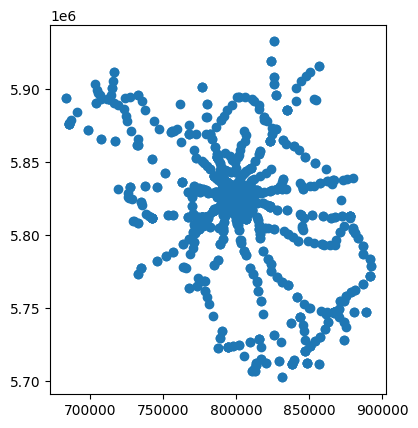

In [268]:
gdf_vbb.plot()

In [269]:
#subset
gdf_vbb = gdf_vbb[["Bauwerk Name", "Bauwerkselement Name", "Bauwerkselement Typ", "geometry"]]

In [270]:
gdf_vbb.head()

,Bauwerk Name,Bauwerkselement Name,Bauwerkselement Typ,geometry
130,"Ahrensfelde, Friedhof Bhf",Bahnsteig Gleis 1,ÖV,POINT (809782.095 5835436.832)
146,"Ahrensfelde, Nord Bhf",Bahnsteig Gleis 1,ÖV,POINT (810309.246 5836607.347)
363,"Alt Rosenthal, Bahnhof",Bahnsteig Gleis 1,ÖV,POINT (857777.543 5835349.029)
364,"Alt Rosenthal, Bahnhof",Bahnsteig Gleis 2,ÖV,POINT (857746.739 5835345.653)
472,"Altdöbern, Bahnhof",Bahnsteig Gleis 1,ÖV,POINT (846451.023 5734281.854)


In [271]:
#gdf_vbb.to_file("gdf_vbb.geojson", driver="GeoJSON")

In [272]:
"""
------------------------------------------------------------------------------
convert df in geodataframe / geometry_400 = lng lat + buffer 500m
------------------------------------------------------------------------------
"""

df["geometry"] = df.apply(lambda row: Point(row["lng"], row["lat"]), axis=1)

gdf = gpd.GeoDataFrame(df, geometry="geometry")

gdf.set_crs(epsg=4326, inplace=True)

gdf = gdf.to_crs(epsg=25832)


<Axes: >

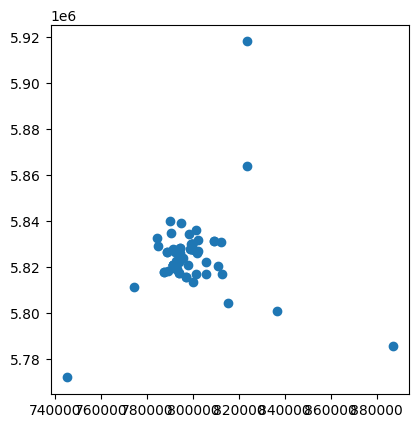

In [273]:
gdf.plot()

In [274]:
#buffer 400m
gdf["geometry_400"] = gdf.geometry.buffer(400)
gdf = gdf.set_geometry("geometry_400")

In [275]:
#intersection
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False) 

result = gpd.sjoin(gdf, gdf_vbb, predicate="intersects")

print(result)

     id                                                     name shortname                                            strasse                      bezirk    plz       plz_ort       von       bis                                                                                            oeffnungszeiten           Mo           Di           Mi           Do           Fr           Sa           So closed-exc hours-exc                                                                                  w3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [276]:
#group by name
result_grouped = (
    result.groupby("name")["Bauwerk Name"] 
    .agg(lambda x: ', '.join(x.unique())) #all results in one column
    .reset_index() 
)
result_grouped.head()

,name,Bauwerk Name
0,17. Berliner Weihnachtszeit vor dem Roten Rathaus - Berlin Mitte,"U Klosterstr. (Berlin), U Rotes Rathaus (Berlin), S+U Alexanderplatz Bhf (Berlin)"
1,Adventsbasar,U Turmstr. (Berlin)
2,Adventsbasar an der Heilandskirche,U Turmstr. (Berlin)
3,Adventsmarkt auf der Domäne Dahlem,U Dahlem-Dorf (Berlin)
4,Adventsmarkt im Rathaus Charlottenburg,U Richard-Wagner-Platz (Berlin)


In [277]:
#add info from intersection to gdf

#merge
gdf = gdf.merge(result_grouped, on="name", how="left")

gdf = gdf.drop(columns=["geometry_400"])
gdf = gdf.set_geometry("geometry")

gdf.head()


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen,geometry,Bauwerk Name
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,Berlin,01.11.24,28.12.24,14:00 Uhr bis 23:00 Uhr,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,None,None,/,/,None,52.5191,13.4086,1,0,0,0,0,0,Berlin,14:00-23:00,,POINT (799063.003 5827914.795),"U Klosterstr. (Berlin), U Rotes Rathaus (Berlin), S+U Alexanderplatz Bhf (Berlin)"
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,12555 Berlin,01.11.24,31.12.24,12:00 - 20:00 Uhr,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,Berlin,12:00-20:00,,POINT (812790.107 5817179.55),NaN
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,0,0,0,0,0,0,0,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin,11:00-18:00,"es werden nur handgefertigte objekte kleiner ateliers und werkstätten gezeigt, die kunsthandwerker sind vor ort\nkeine handels-importware kein rahmenprogramm",POINT (787672.037 5818074.028),S Mexikoplatz (Berlin)
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,08.12.24,08.12.24,11:00 - 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,0,Berlin,11:00-18:00,"es werden nur handgefertigte objekte kleiner ateliers und werkstätten gezeigt, die kunsthandwerker sind vor ort\nkeine handels-importware kein rahmenprogramm",POINT (787672.037 5818074.028),S Mexikoplatz (Berlin)
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,10405 Berlin,01.12.24,01.12.24,12:00 - 19:00 Uhr,0,0,0,0,0,0,12:00-19:00,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,Berlin,12:00-19:00,"neben dem adventsökomarkt bleibt der wöchentliche donnerstag ökomarkt am kollwitzplatz bestehen und findet immer von 1200 bis 1900 uhr statt jeden donnerstag und an den adventssonntagen 112, 812 1512 und 22 12 2024",POINT (799547.178 5829896.819),NaN


In [278]:
#set short_distance = 1 when "Bauwerk Name" is not NA
gdf.loc[gdf["Bauwerk Name"].notna(), "short_distance"] = 1

gdf.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen,geometry,Bauwerk Name
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,Berlin,01.11.24,28.12.24,14:00 Uhr bis 23:00 Uhr,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,None,None,/,/,None,52.5191,13.4086,1,0,0,0,0,1,Berlin,14:00-23:00,,POINT (799063.003 5827914.795),"U Klosterstr. (Berlin), U Rotes Rathaus (Berlin), S+U Alexanderplatz Bhf (Berlin)"
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,12555 Berlin,01.11.24,31.12.24,12:00 - 20:00 Uhr,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,Berlin,12:00-20:00,,POINT (812790.107 5817179.55),NaN
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,0,0,0,0,0,0,0,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,1,Berlin,11:00-18:00,"es werden nur handgefertigte objekte kleiner ateliers und werkstätten gezeigt, die kunsthandwerker sind vor ort\nkeine handels-importware kein rahmenprogramm",POINT (787672.037 5818074.028),S Mexikoplatz (Berlin)
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,08.12.24,08.12.24,11:00 - 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,1,Berlin,11:00-18:00,"es werden nur handgefertigte objekte kleiner ateliers und werkstätten gezeigt, die kunsthandwerker sind vor ort\nkeine handels-importware kein rahmenprogramm",POINT (787672.037 5818074.028),S Mexikoplatz (Berlin)
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,10405 Berlin,01.12.24,01.12.24,12:00 - 19:00 Uhr,0,0,0,0,0,0,12:00-19:00,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,Berlin,12:00-19:00,"neben dem adventsökomarkt bleibt der wöchentliche donnerstag ökomarkt am kollwitzplatz bestehen und findet immer von 1200 bis 1900 uhr statt jeden donnerstag und an den adventssonntagen 112, 812 1512 und 22 12 2024",POINT (799547.178 5829896.819),NaN


In [279]:
#number of "long distance" markets
len(gdf[gdf["short_distance"]==0])

33

In [280]:
#rename column "Bauwerk Name" in "train"
gdf.rename(columns={"Bauwerk Name": "train"}, inplace = True)

gdf.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen,geometry,train
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,,Berlin,01.11.24,28.12.24,14:00 Uhr bis 23:00 Uhr,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,None,None,/,/,None,52.5191,13.4086,1,0,0,0,0,1,Berlin,14:00-23:00,,POINT (799063.003 5827914.795),"U Klosterstr. (Berlin), U Rotes Rathaus (Berlin), S+U Alexanderplatz Bhf (Berlin)"
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555,12555 Berlin,01.11.24,31.12.24,12:00 - 20:00 Uhr,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,Berlin,12:00-20:00,,POINT (812790.107 5817179.55),NaN
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,0,0,0,0,0,0,0,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,1,Berlin,11:00-18:00,"es werden nur handgefertigte objekte kleiner ateliers und werkstätten gezeigt, die kunsthandwerker sind vor ort\nkeine handels-importware kein rahmenprogramm",POINT (787672.037 5818074.028),S Mexikoplatz (Berlin)
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163,14163 Berlin,08.12.24,08.12.24,11:00 - 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,1,Berlin,11:00-18:00,"es werden nur handgefertigte objekte kleiner ateliers und werkstätten gezeigt, die kunsthandwerker sind vor ort\nkeine handels-importware kein rahmenprogramm",POINT (787672.037 5818074.028),S Mexikoplatz (Berlin)
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405,10405 Berlin,01.12.24,01.12.24,12:00 - 19:00 Uhr,0,0,0,0,0,0,12:00-19:00,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,Berlin,12:00-19:00,"neben dem adventsökomarkt bleibt der wöchentliche donnerstag ökomarkt am kollwitzplatz bestehen und findet immer von 1200 bis 1900 uhr statt jeden donnerstag und an den adventssonntagen 112, 812 1512 und 22 12 2024",POINT (799547.178 5829896.819),NaN


In [281]:
"""
------------------------------------------------------------------------------
Formatting for the csv file

name	type	purpose	example
id	string	a unique id - must be a number	"1"
shortname	string	name of the market	
strasse	string	street name	
plz_ort	string	post code	
train	string	text about public transport	
image	string	image name including file type e.g. .png	
urheberschaft	string	image copyright text	
von	string	opening date	"17.11.22"
bis	string	closing date	"17.11.22"
Mo	string	opening times Monday	"15:00-22:00"
Di	string	opening times Tuesday	"15:00-22:00"
Mi	string	opening times Wednesday	"15:00-22:00"
Do	string	opening times Thursday	"15:00-22:00"
Fr	string	opening times Friday	"15:00-22:00"
Sa	string	opening times Saturday	"15:00-22:00"
So	string	opening times Sunday	"15:00-22:00"
closed-exc	string	date exeptions	"20.11.22, 24.12.22"
hours-exc	string	time exeptions	"25.12.22=11:00-21:00, 26.12.22=11:00-21:00"
w3	string	market website including https://www.	
bemerkungen	string	some extra text about the market	
lat	number	coordinate	52.5076327
lng	number	coordinate	13.45436119
ignore	string	if you want to ignore the entry	'0' or '1'
immer-kostenlos	string	filter free	'0' or '1'
international	string	filter international	'0' or '1'
barrierefrei	string	filter barrierefrei	'0' or '1'
action	string	filter action	'0' or '1'
short_distance	string	filter short_distance	'0' or '1'

------------------------------------------------------------------------------
"""

'\n------------------------------------------------------------------------------\nFormatting for the csv file\n\nname\ttype\tpurpose\texample\nid\tstring\ta unique id - must be a number\t"1"\nshortname\tstring\tname of the market\t\nstrasse\tstring\tstreet name\t\nplz_ort\tstring\tpost code\t\ntrain\tstring\ttext about public transport\t\nimage\tstring\timage name including file type e.g. .png\t\nurheberschaft\tstring\timage copyright text\t\nvon\tstring\topening date\t"17.11.22"\nbis\tstring\tclosing date\t"17.11.22"\nMo\tstring\topening times Monday\t"15:00-22:00"\nDi\tstring\topening times Tuesday\t"15:00-22:00"\nMi\tstring\topening times Wednesday\t"15:00-22:00"\nDo\tstring\topening times Thursday\t"15:00-22:00"\nFr\tstring\topening times Friday\t"15:00-22:00"\nSa\tstring\topening times Saturday\t"15:00-22:00"\nSo\tstring\topening times Sunday\t"15:00-22:00"\nclosed-exc\tstring\tdate exeptions\t"20.11.22, 24.12.22"\nhours-exc\tstring\ttime exeptions\t"25.12.22=11:00-21:00, 26.12.2

In [282]:
#drop irrelevant columns
gdf.drop(columns=["plz", "ort", "formatierteOeffnungszeit", "cleanedBemerkungen", "geometry"], inplace = True)

gdf.head()


,id,name,shortname,strasse,bezirk,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,train
0,183,Smash Burger,None,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,Berlin,01.11.24,28.12.24,14:00 Uhr bis 23:00 Uhr,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,None,None,/,/,None,52.5191,13.4086,1,0,0,0,0,1,"U Klosterstr. (Berlin), U Rotes Rathaus (Berlin), S+U Alexanderplatz Bhf (Berlin)"
1,60,Winterzauber Weihnachtsmarkt,None,Möllhausenufer 30,Treptow-Köpenick,12555 Berlin,01.11.24,31.12.24,12:00 - 20:00 Uhr,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,None,None,https://strandbad-wendenschloss.berlin,/,None,52.4152,13.6002,0,0,0,0,0,0,NaN
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,0,0,0,0,0,0,0,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,1,S Mexikoplatz (Berlin)
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,None,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163 Berlin,08.12.24,08.12.24,11:00 - 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,None,None,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort.\nKeine Handels-/Importware! Kein Rahmenprogramm.",None,52.4370,13.2327,0,0,0,0,0,1,S Mexikoplatz (Berlin)
4,102,Adventsökomarkt der Grünen Liga,None,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405 Berlin,01.12.24,01.12.24,12:00 - 19:00 Uhr,0,0,0,0,0,0,12:00-19:00,None,None,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",None,52.5366,13.4175,0,0,0,0,0,0,NaN


In [283]:
#date types
gdf.dtypes

id                   int64
name                object
shortname           object
strasse             object
bezirk              object
plz_ort             object
von                 object
bis                 object
oeffnungszeiten     object
Mo                  object
Di                  object
Mi                  object
Do                  object
Fr                  object
Sa                  object
So                  object
closed-exc          object
hours-exc           object
w3                  object
bemerkungen         object
bemerkungen_en      object
lat                float64
lng                float64
ignore               int64
immer-kostenlos      int64
international        int64
barrierefrei         int64
action               int64
short_distance       int64
train               object
dtype: object

In [284]:
#adjust date types
gdf[["id", "name", "shortname", "strasse", "bezirk", "plz_ort", "train", "von", "bis", "oeffnungszeiten", 
     "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "w3", "bemerkungen", "bemerkungen_en", "ignore", "immer-kostenlos", 
     "international", "barrierefrei", "action", "short_distance"]] = gdf[["id", "name", "shortname", "strasse", "bezirk", "plz_ort", "train", "von", "bis", "oeffnungszeiten", 
     "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "w3", "bemerkungen", "bemerkungen_en", "ignore", "immer-kostenlos", 
     "international", "barrierefrei", "action", "short_distance"]].astype("string")

gdf.dtypes

id                 string[python]
name               string[python]
shortname          string[python]
strasse            string[python]
bezirk             string[python]
plz_ort            string[python]
von                string[python]
bis                string[python]
oeffnungszeiten    string[python]
Mo                 string[python]
Di                 string[python]
Mi                 string[python]
Do                 string[python]
Fr                 string[python]
Sa                 string[python]
So                 string[python]
closed-exc         string[python]
hours-exc          string[python]
w3                 string[python]
bemerkungen        string[python]
bemerkungen_en     string[python]
lat                       float64
lng                       float64
ignore             string[python]
immer-kostenlos    string[python]
international      string[python]
barrierefrei       string[python]
action             string[python]
short_distance     string[python]
train         

In [285]:
#merge with image file
images = pd.read_excel("Weihnachtsmarkt_Bilder.xlsx")
images["id"] = images["id"].astype("string")
images.drop(columns=["name"], inplace=True) 

xmasData = gdf.merge(images, on="id", how="left")

xmasData.head()


,id,name,shortname,strasse,bezirk,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,train,image,urheberschaft
0,183,Smash Burger,<NA>,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,Berlin,01.11.24,28.12.24,14:00 Uhr bis 23:00 Uhr,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,<NA>,<NA>,/,/,<NA>,52.5191,13.4086,1,0,0,0,0,1,"U Klosterstr. (Berlin), U Rotes Rathaus (Berlin), S+U Alexanderplatz Bhf (Berlin)",NaN,NaN
1,60,Winterzauber Weihnachtsmarkt,<NA>,Möllhausenufer 30,Treptow-Köpenick,12555 Berlin,01.11.24,31.12.24,12:00 - 20:00 Uhr,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,<NA>,<NA>,https://strandbad-wendenschloss.berlin,/,<NA>,52.4152,13.6002,0,0,0,0,0,0,<NA>,Winterzauber_im_Advent.jpg,Copyright: Kira Hofmann
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,<NA>,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,0,0,0,0,0,0,0,<NA>,<NA>,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort. Keine Handels-/Importware! Kein Rahmenprogramm.",<NA>,52.4370,13.2327,0,0,0,0,0,1,S Mexikoplatz (Berlin),Mexikoplatz_Weihnachtsmarkt.jpg,"Colin Smith, CC BY-SA 2.0 via Wikimedia Commons"
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,<NA>,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163 Berlin,08.12.24,08.12.24,11:00 - 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,<NA>,<NA>,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort. Keine Handels-/Importware! Kein Rahmenprogramm.",<NA>,52.4370,13.2327,0,0,0,0,0,1,S Mexikoplatz (Berlin),Mexikoplatz_Weihnachtsmarkt.jpg,"Colin Smith, CC BY-SA 2.0 via Wikimedia Commons"
4,102,Adventsökomarkt der Grünen Liga,<NA>,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405 Berlin,01.12.24,01.12.24,12:00 - 19:00 Uhr,0,0,0,0,0,0,12:00-19:00,<NA>,<NA>,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",<NA>,52.5366,13.4175,0,0,0,0,0,0,<NA>,NaN,NaN


In [286]:
#case: missing images
condition = xmasData["image"].isna()

xmasData.loc[condition, "image"] = "placeholder.png"
xmasData.loc[condition, "urheberschaft"] = "freestocks.org, CC BY-SA 4.0 via Wikimedia Commons"

xmasData.head()


,id,name,shortname,strasse,bezirk,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,train,image,urheberschaft
0,183,Smash Burger,<NA>,"Landsberger Allee, Rotes Rathaus, Alexander Platz",Mitte,Berlin,01.11.24,28.12.24,14:00 Uhr bis 23:00 Uhr,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,14:00-23:00,<NA>,<NA>,/,/,<NA>,52.5191,13.4086,1,0,0,0,0,1,"U Klosterstr. (Berlin), U Rotes Rathaus (Berlin), S+U Alexanderplatz Bhf (Berlin)",placeholder.png,"freestocks.org, CC BY-SA 4.0 via Wikimedia Commons"
1,60,Winterzauber Weihnachtsmarkt,<NA>,Möllhausenufer 30,Treptow-Köpenick,12555 Berlin,01.11.24,31.12.24,12:00 - 20:00 Uhr,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,12:00-20:00,<NA>,<NA>,https://strandbad-wendenschloss.berlin,/,<NA>,52.4152,13.6002,0,0,0,0,0,0,<NA>,Winterzauber_im_Advent.jpg,Copyright: Kira Hofmann
2,63,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,<NA>,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163 Berlin,01.12. / 15.12. / 22.12.2024,01.12. / 15.12. / 22.12.2024,11:00 - 18:00 Uhr,0,0,0,0,0,0,0,<NA>,<NA>,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort. Keine Handels-/Importware! Kein Rahmenprogramm.",<NA>,52.4370,13.2327,0,0,0,0,0,1,S Mexikoplatz (Berlin),Mexikoplatz_Weihnachtsmarkt.jpg,"Colin Smith, CC BY-SA 2.0 via Wikimedia Commons"
3,66,Kunsthandwerklicher Weihnachtsmarkt Mexikoplatz,<NA>,Mexikoplatz und Bülowstraße 1-8,Steglitz-Zehlendorf,14163 Berlin,08.12.24,08.12.24,11:00 - 18:00 Uhr,0,0,0,0,0,0,11:00-18:00,<NA>,<NA>,https://kunsthand-berlin.de/,"Es werden nur handgefertigte Objekte kleiner Ateliers und Werkstätten gezeigt, die Kunsthandwerker sind vor Ort. Keine Handels-/Importware! Kein Rahmenprogramm.",<NA>,52.4370,13.2327,0,0,0,0,0,1,S Mexikoplatz (Berlin),Mexikoplatz_Weihnachtsmarkt.jpg,"Colin Smith, CC BY-SA 2.0 via Wikimedia Commons"
4,102,Adventsökomarkt der Grünen Liga,<NA>,Wörtherstraße am Kollwitzplatz - zwischen Knaackstraße und Kollwitzstraße,Pankow,10405 Berlin,01.12.24,01.12.24,12:00 - 19:00 Uhr,0,0,0,0,0,0,12:00-19:00,<NA>,<NA>,https://www.grueneliga-berlin.de,"Neben dem Adventsökomarkt bleibt der wöchentliche Donnerstag Ökomarkt am Kollwitzplatz bestehen und findet immer von 12.00 bis 19.00 Uhr statt (jeden Donnerstag und an den Adventssonntagen( 1.12., 8.12. 15.12. und 22. 12. 2024)",<NA>,52.5366,13.4175,0,0,0,0,0,0,<NA>,placeholder.png,"freestocks.org, CC BY-SA 4.0 via Wikimedia Commons"


In [287]:
#csv
xmasData.to_csv("markets_dataProcessing.csv", index= False)
